In [1]:
import xarray as xr
import numpy as np
import cmocean
import cartopy as cr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
# reads a single netCDF file
ds_sst = xr.open_dataset('data/remss/20190426120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc')

In [3]:
ds_sst

<xarray.Dataset>
Dimensions:           (lat: 2048, lon: 4096, time: 1)
Coordinates:
  * lat               (lat) float32 -89.956 -89.86811 ... 89.86811 89.956
  * lon               (lon) float32 -179.956 -179.8681 ... 179.8681 179.956
  * time              (time) datetime64[ns] 2019-04-26T12:00:00
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
Attributes:
    Conventions:                CF-1.6,ACDD-1.3
    title:                      Analysed foundation sea surface temperature o...
    summary:                    A merged, multi-sensor L4 foundation SST prod...
    references:                 http://www.remss.com/measurements/sea-surface...
    institution:                REMSS
    history:                    2019-05-16 22:06:41-0700 created by fuse_sens...
    comment:                    This research was supported 

In [6]:
ds_sst.data_vars

Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...

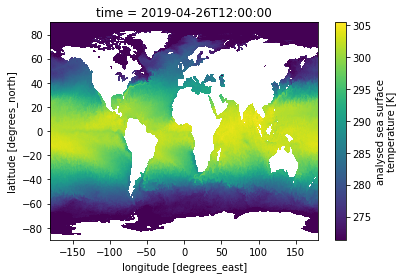

In [7]:
ds_sst.analysed_sst.plot()

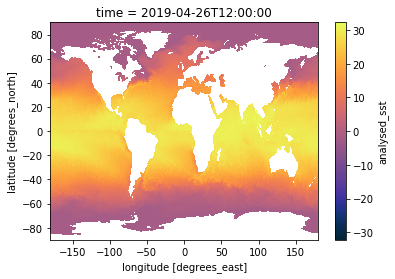

In [8]:
(ds_sst.analysed_sst-273.15).plot(cmap='cmo.thermal')

In [9]:
ds_sst = ds_sst.analysed_sst - 273.15

In [10]:
ds_sst.data

array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7999878, -1.7999878, -1.7999878, ..., -1.7999878,
         -1.7999878, -1.7999878],
        [-1.7999878, -1.7999878, -1.7999878, ..., -1.7999878,
         -1.7999878, -1.7999878],
        [-1.7999878, -1.7999878, -1.7999878, ..., -1.7999878,
         -1.7999878, -1.7999878]]], dtype=float32)

In [11]:
ds_sst.data.shape

(1, 2048, 4096)

In [12]:
ds_sst.time
# or ds_sst['time']

<xarray.DataArray 'time' (time: 1)>
array(['2019-04-26T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-04-26T12:00:00
Attributes:
    standard_name:  time
    axis:           T
    long_name:      nominal time of L4 analysis

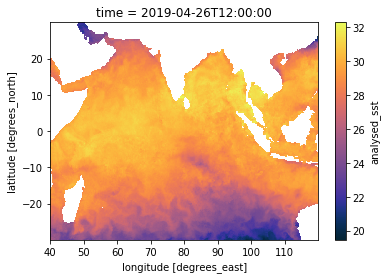

In [14]:
ds_sst.sel(lon=slice(40,120),lat=slice(-30,30)).plot(cmap='cmo.thermal')

In [16]:
ds = xr.open_mfdataset('data/remss/*.nc',combine='by_coords')

In [17]:
ds

<xarray.Dataset>
Dimensions:           (lat: 2048, lon: 4096, time: 10)
Coordinates:
  * lat               (lat) float32 -89.956 -89.86811 ... 89.86811 89.956
  * lon               (lon) float32 -179.956 -179.8681 ... 179.8681 179.956
  * time              (time) datetime64[ns] 2019-04-26T12:00:00 ... 2019-05-05T12:00:00
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(1, 2048, 4096), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(1, 2048, 4096), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(1, 2048, 4096), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(1, 2048, 4096), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.6,ACDD-1.3
    title:                      Analysed foundation sea surface temperature o...
    summary:                    A merged, multi-sensor L4 foundation SST prod...
    references:                

In [20]:
ds.analysed_sst.shape

(10, 2048, 4096)

In [21]:
ds.time.data

array(['2019-04-26T12:00:00.000000000', '2019-04-27T12:00:00.000000000',
       '2019-04-28T12:00:00.000000000', '2019-04-29T12:00:00.000000000',
       '2019-04-30T12:00:00.000000000', '2019-05-01T12:00:00.000000000',
       '2019-05-02T12:00:00.000000000', '2019-05-03T12:00:00.000000000',
       '2019-05-04T12:00:00.000000000', '2019-05-05T12:00:00.000000000'],
      dtype='datetime64[ns]')

In [27]:
ds = ds.analysed_sst - 273.15

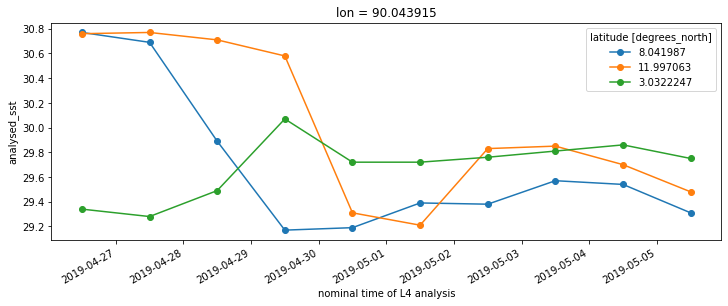

In [30]:
ds.sel(lat=[8,12,3],lon=90,method='nearest').plot(hue='lat',figsize=(12,4),marker='o')

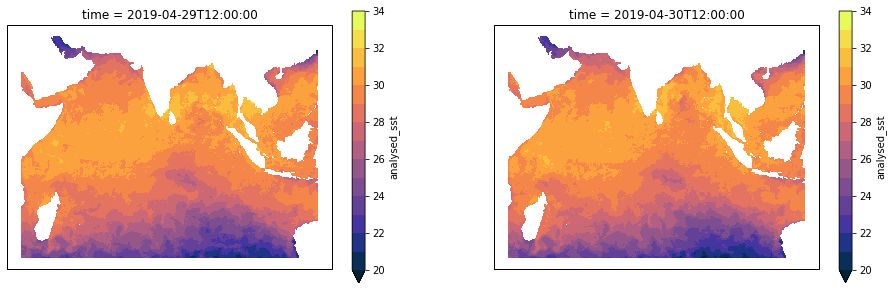

In [53]:
fig,ax = plt.subplots(1,2,figsize=(16,5),subplot_kw={'projection':ccrs.PlateCarree()})
ds.isel(time=3).sel(lon=slice(40,120),lat=slice(-30,30)).plot(ax=ax[0],cmap='cmo.thermal',levels=np.arange(20,35,1))
ds.isel(time=4).sel(lon=slice(40,120),lat=slice(-30,30)).plot(ax=ax[1],cmap='cmo.thermal',levels=np.arange(20,35,1))

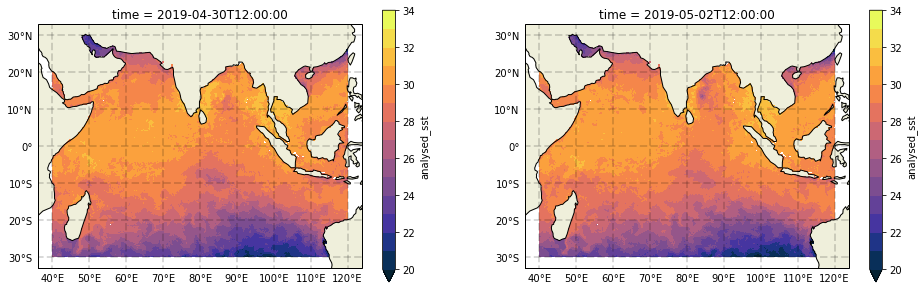

In [71]:
import go_land
fig,ax = plt.subplots(1,2,figsize=(16,5),subplot_kw={'projection':ccrs.PlateCarree()})
ds.isel(time=4).sel(lon=slice(40,120),lat=slice(-30,30)).plot(ax=ax[0],cmap='cmo.thermal',levels=np.arange(20,35,1))
ds.isel(time=6).sel(lon=slice(40,120),lat=slice(-30,30)).plot(ax=ax[1],cmap='cmo.thermal',levels=np.arange(20,35,1))
for p in ax:
    go_land.fig_beauty(ax=p)

<a list of 7 text.Text objects>

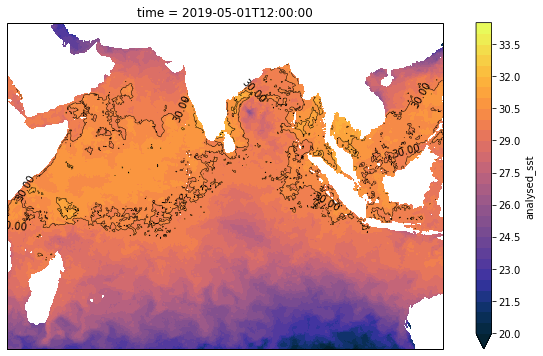

In [75]:
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection':ccrs.PlateCarree()})
cf = ds.isel(time=5).sel(lon=slice(40,120),lat=slice(-30,30)).plot.contourf(ax=ax,cmap='cmo.thermal',levels=np.arange(20,35,0.5))
c = ax.contour(cf,levels=np.arange(30,35,1),colors='black',linewidths=0.5)
ax.clabel(c,inline=True,fmt='%3.2f')

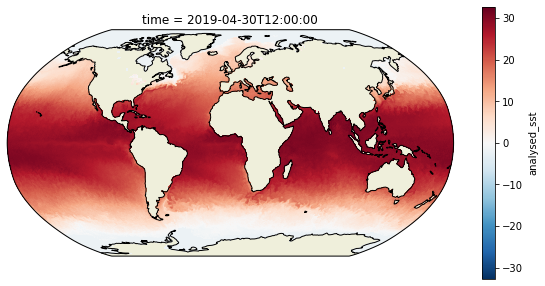

In [69]:
fig,ax = plt.subplots(subplot_kw={'projection':ccrs.Robinson()},figsize=(10,5))
ds.isel(time='2019-04-').plot(ax=ax,transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND)